# Exercise 18

## Analyze class homeworks


In [45]:
import pandas as pd
import numpy as np
import re as re
import textdistance
import seaborn as sns
from sklearn.model_selection import  cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression


%matplotlib inline
import matplotlib.pyplot as plt
from py_translator import Translator

In [5]:
data = pd.read_excel('datasets/E18.xlsx')
data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


In [6]:
## Ver cuantos campos hay nulos
data.isna()

,Sexo,T1,T2,T3,T4,T5,T6
0,False,False,True,False,True,False,False
1,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False
5,False,False,True,False,False,True,False
6,False,False,False,False,True,False,True
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [7]:
data

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...
5,H,Siendo dos grandes software's de analítica los...,NaN,El árbol de decisión construye modelos de clas...,El objetivo de los métodos de ensemble es comb...,NaN,Gradient Boosting es una técnica de aprendizaj...
6,H,Data Scientist y Data Engineer son dos profesi...,For Machine Learning there are 3 different typ...,Decision tree is a methodology that is used to...,NaN,According to the paper 'Do we Need Hundreds of...,NaN
7,M,Las diferencias de un científico de datos y un...,El concepto Machine Learning nace de la indust...,Los arboles de decisión son una técnica fundam...,Comencemos por definir la palabra ensamble en ...,El artículo fue publicado en octubre del 2014 ...,NaN
8,H,Uno de los criterios más importantes en la sel...,Dentro de los algoritmos usados para programar...,Los arboles de decisión son estructuras de dat...,"En términos de Machine Learning, Ensemble es l...",El artículo “¿Do we need hundreds of classifie...,"Dentro de los algoritmos de “ensembling”, más ..."
9,H,Diferencia entre un científico de datos y un i...,El aprendizaje de máquinas tiene cuatro grande...,Los tipos de algoritmos y aplicaciones de árbo...,El aprendizaje conjunto es una herramienta que...,Este papper trata de encontrar a través 121 co...,Gradient Boosting su técnica consiste en entre...


# Exercise 18.1

Analyze the writing patterns of each student

Lo primero que vamos a realizar es:
- Los nulos a espacio
- pasar el texto a inglés
- limpiar el texto
- concatenar el texto

In [8]:
data.fillna('Null', inplace=True); data

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,Null,Los árboles de decisión es uno de los algoritm...,Null,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,Null,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,Null
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...
5,H,Siendo dos grandes software's de analítica los...,Null,El árbol de decisión construye modelos de clas...,El objetivo de los métodos de ensemble es comb...,Null,Gradient Boosting es una técnica de aprendizaj...
6,H,Data Scientist y Data Engineer son dos profesi...,For Machine Learning there are 3 different typ...,Decision tree is a methodology that is used to...,Null,According to the paper 'Do we Need Hundreds of...,Null
7,M,Las diferencias de un científico de datos y un...,El concepto Machine Learning nace de la indust...,Los arboles de decisión son una técnica fundam...,Comencemos por definir la palabra ensamble en ...,El artículo fue publicado en octubre del 2014 ...,Null
8,H,Uno de los criterios más importantes en la sel...,Dentro de los algoritmos usados para programar...,Los arboles de decisión son estructuras de dat...,"En términos de Machine Learning, Ensemble es l...",El artículo “¿Do we need hundreds of classifie...,"Dentro de los algoritmos de “ensembling”, más ..."
9,H,Diferencia entre un científico de datos y un i...,El aprendizaje de máquinas tiene cuatro grande...,Los tipos de algoritmos y aplicaciones de árbo...,El aprendizaje conjunto es una herramienta que...,Este papper trata de encontrar a través 121 co...,Gradient Boosting su técnica consiste en entre...


In [9]:
##Quitar caracteres especiales para hacer la traducción menos los puntos y las comas
for i, row in data.iterrows():
    data.loc[i,'W1']=re.sub(r"[-()\"#/@;:<>{}`+=~|]", "", data.loc[i,'T1'])
    data.loc[i,'W2']=re.sub(r"[-()\"#/@;:<>{}`+=~|]", "", data.loc[i,'T2'])
    data.loc[i,'W3']=re.sub(r"[-()\"#/@;:<>{}`+=~|]", "", data.loc[i,'T3'])
    data.loc[i,'W4']=re.sub(r"[-()\"#/@;:<>{}`+=~|]", "", data.loc[i,'T4'])
    data.loc[i,'W5']=re.sub(r"[-()\"#/@;:<>{}`+=~|]", "", data.loc[i,'T5'])
    data.loc[i,'W6']=re.sub(r"[-()\"#/@;:<>{}`+=~|]", "", data.loc[i,'T6'])


In [10]:
data

,Sexo,T1,T2,T3,T4,T5,T6,W1,W2,W3,W4,W5,W6
0,H,Un científico de datos y un ingeniero de datos...,Null,Los árboles de decisión es uno de los algoritm...,Null,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...,Null,Los árboles de decisión es uno de los algoritm...,Null,En el documento Do We Need Hundreds of Classif...,Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,Null,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,Null,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,Null,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo Una persona ...,¿Se necesitan cientos de modelos para resolver...,Null
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...
5,H,Siendo dos grandes software's de analítica los...,Null,El árbol de decisión construye modelos de clas...,El objetivo de los métodos de ensemble es comb...,Null,Gradient Boosting es una técnica de aprendizaj...,Siendo dos grandes software's de analítica los...,Null,El árbol de decisión construye modelos de clas...,El objetivo de los métodos de ensemble es comb...,Null,Gradient Boosting es una técnica de aprendizaj...
6,H,Data Scientist y Data Engineer son dos profesi...,For Machine Learning there are 3 different typ...,Decision tree is a methodology that is used to...,Null,According to the paper 'Do we Need Hundreds of...,Null,Data Scientist y Data Engineer son dos profesi...,For Machine Learning there are 3 different typ...,Decision tree is a methodology that is used to...,Null,According to the paper 'Do we Need Hundreds of...,Null
7,M,Las diferencias de un científico de datos y un...,El concepto Machine Learning nace de la indust...,Los arboles de decisión son una técnica fundam...,Comencemos por definir la palabra ensamble en ...,El artículo fue publicado en octubre del 2014 ...,Null,Las diferencias de un científico de datos y un...,El concepto Machine Learning nace de la indust...,Los arboles de decisión son una técnica fundam...,Comencemos por definir la palabra ensa

Borrar los índices 11 y 21 porque a realizar el translate generan error se identifica que fueron textos alterados y están en 2 idiomas diferentes

In [11]:
data.loc[21,'W5']

'Cuando se comienza a explorar en el mundo del modelamiento matemático, se suele asociar a los modelos de redes neuronales como los de mayor acierto o accuracy dada su complejidad tanto de entendimiento como de procesamiento al momento de clasificar parametrías específicos en un dataset, sin embargo, tanto la teoría académica y la practica empírica ha demostrado que modelos un poco más “sencillo”, si se permite la palabra, logran tener una capacidad predictiva más alta, con menor esfuerzo. Una razón importante por lo que por un lado tienen mejor comportamiento y por otro son preferidos por los analistas de datos, es que conceptos tradicionales como heterocedasticidad, autocorrelación o multicolinealidad, no son supuestos que se deban superar en este tipo de modelos, lo que ahorra tiempo y energías en la elaboración del modelo. Ahora bien, los modelos que conocemos como tradicionales, a pesar de sus limitaciones, permiten una clara interpretabilidad de los resultados y por lo tanto una 

In [12]:
data.loc[11,'W4']

'Los metodos de ensamble combinan múltiples algoritmos para obtener un mejor desempeño predictivo que el que podría ofrecer un algoritmo de forma individual.Esta combinación de métodos exige un alto costo computacional en términos de mayor procesamiento, por lo tanto es común que se usen algoritmos de ejecución más rápida como los árboles de decisión.El principal problema de las técnicas de ensamble es el sobre ajuste y debe tenerse en cuenta para tomar las precauciones necesarias, por lo tanto las técnicas utilizadas para combinar los algoritmos tienden a reducir esta problemática.Existen varias técnicas de combinación de modelos, entre ellasBagging, su nombre proviene de la abreviatura de las palabras boostrap aggregation. Provoca una reducción en la varianza y evita el sobre ajuste. Se utiliza para conseguir combinaciones de modelos a partir de una familia inicial. Se utiliza mayoritariamente en modelos basados en árboles de decisión pero su utilización se pude extender a cualquier 

In [13]:
data=data.drop(data.index[[11,21]])

In [14]:
##Pasar cada texto a inglés
for i, row in data.iterrows():
    data.loc[i,'W1']=Translator().translate(text=data.loc[i,'W1'], dest='en').text
    data.loc[i,'W2']=Translator().translate(text=data.loc[i,'W2'], dest='en').text
    data.loc[i,'W3']=Translator().translate(text=data.loc[i,'W3'], dest='en').text
    data.loc[i,'W4']=Translator().translate(text=data.loc[i,'W4'], dest='en').text
    data.loc[i,'W5']=Translator().translate(text=data.loc[i,'W5'], dest='en').text
    data.loc[i,'W6']=Translator().translate(text=data.loc[i,'W6'], dest='en').text

In [16]:
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,W1,W2,W3,W4,W5,W6
0,H,Un científico de datos y un ingeniero de datos...,Null,Los árboles de decisión es uno de los algoritm...,Null,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,A data scientist and a data engineer have cert...,Null,Decision trees are one of the most used classi...,Null,In the document Do We Need Hundreds of Classif...,Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,Null,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Although both profiles have skills that are co...,Although the concession is not total in the su...,Null,In Machine Learing the purpose of the assembly...,The paper published in 2014 makes an evaluatio...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analyzing information is a ne...,In the framework of Machine Learning we find f...,"Classification tree As its name implies, this ...",This is a mechanism that uses several algorith...,The paper analyzes 179 classifiers from 17 dif...,Gradient Boosting Classifier seeks to learn fr...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,Null,Machine learning algorithms seek to predict a ...,The algorithms of machine learning seek to pre...,Decision trees belong to supervised classifica...,Consider the following example A person needs ...,Do you need hundreds of models to solve proble...,Null
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs. R for data analysis. Although both ...,Types of learning in Machine Learning. The ML ...,Types of decision trees and applications. A de...,The combination of models or ensemble is a way...,"In the article, about 180 different classifier...",XGBoosting vs GBoosting. Although the base alg...


Vamos a concatenar el texto 

In [17]:
data['WorkText_Total']=data['W1']+' '+data['W2']+' '+data['W3']+' '+data['W4']+' '+data['W5']+' '+data['W6']
data.loc[39,'WorkText_Total']

"The data engineer and the data scientists are two roles within a analytical team that complement each other. While the engineer is in charge of guaranteeing the architecture and infrastructure for the storage and processing of large volumes of data, the scientist focuses mainly on analyzing them. Therefore the domain and management of tools such as the skills in each role is different but very related, because to analyze the data you need to access these then they must be available, and if you want to transform them, there must be hardware and software that allows them to be managed. Communication and understanding as in all equipment is fundamental and bidirectional, the scientist relies on the engineer who should recommend and ensure that the requirements and needs of the business do not present setbacks due to technological issues and data flow the scientist with his expertis applies statistical and modeling techniques with the support of tools to find patterns and insights in the 

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

Se define una función de similaridad basada en Hamming

In [27]:
results = pd.DataFrame(0.00, index=data.index, columns=data.index)

In [28]:
def similarity(data):

    
    
    for i, row in data.iterrows():
        a=str(data.loc[i,'WorkText_Total'])
        for j, row in data.iterrows():
            b=str(data.loc[j,'WorkText_Total'])
            results.loc[i,j]=textdistance.hamming.normalized_similarity(a, b)
                    
    assert results.shape == (data.shape[0], data.shape[0])

    return results


In [29]:
similarity(data)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,1.000000,0.052090,0.066920,0.060061,0.062286,0.046714,0.053110,0.065854,0.053202,0.065808,...,0.041246,0.070349,0.067569,0.050051,0.066291,0.053399,0.009083,0.059620,0.057095,0.054129
1,0.052090,1.000000,0.057567,0.063546,0.057404,0.061488,0.069459,0.046793,0.069332,0.050860,...,0.059337,0.049627,0.050408,0.063812,0.050160,0.041583,0.011007,0.044656,0.063538,0.069332
2,0.066920,0.057567,1.000000,0.063780,0.067955,0.049413,0.053975,0.060960,0.056791,0.068156,...,0.047083,0.069572,0.068325,0.054267,0.062763,0.052053,0.010290,0.056628,0.062518,0.053102
3,0.060061,0.063546,0.063780,1.000000,0.066639,0.059504,0.060739,0.048940,0.065117,0.057779,...,0.048501,0.059930,0.054957,0.067812,0.050412,0.050707,0.009992,0.050563,0.065005,0.062423
4,0.062286,0.057404,0.067955,0.066639,1.000000,0.058033,0.060132,0.060531,0.059712,0.067408,...,0.047749,0.066074,0.061084,0.066429,0.058730,0.048239,0.010284,0.056785,0.065379,0.060237
5,0.046714,0.061488,0.049413,0.059504,0.058033,1.000000,0.065617,0.042672,0.065676,0.049084,...,0.062335,0.047642,0.052358,0.054336,0.042934,0.038516,0.013775,0.036150,0.061549,0.062468
6,0.053110,0.069459,0.053975,0.060739,0.060132,0.065617,1.000000,0.046707,0.069171,0.054413,...,0.057368,0.052651,0.050594,0.064412,0.046043,0.038965,0.011930,0.042136,0.064943,0.069933
7,0.065854,0.046793,0.060960,0.048940,0.060531,0.042672,0.046707,1.000000,0.046536,0.065940,...,0.038207,0.063192,0.066712,0.048339,0.068224,0.060429,0.008242,0.069150,0.051172,0.048253
8,0.053202,0.069332,0.056791,0.065117,0.059712,0.065676,0.069171,0.046536,1.000000,0.053571,...,0.057660,0.052841,0.057835,0.063092,0.048731,0.040760,0.012023,0.045995,0.065411,0.069338
9,0.065808,0.050860,0.068156,0.057779,0.067408,0.049084,0.054413,0.065940,0.053571,1.000000,...,0.043568,0.070213,0.072781,0.055441,0.066964,0.056465,0.008508,0.060093,0.061518,0.053852


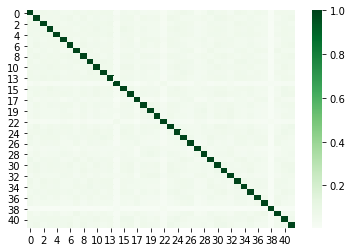

In [31]:

sns.heatmap(results, cmap="Greens")
plt.show()


Hay similaridades muy bajas, revisar con una escala menor a 20

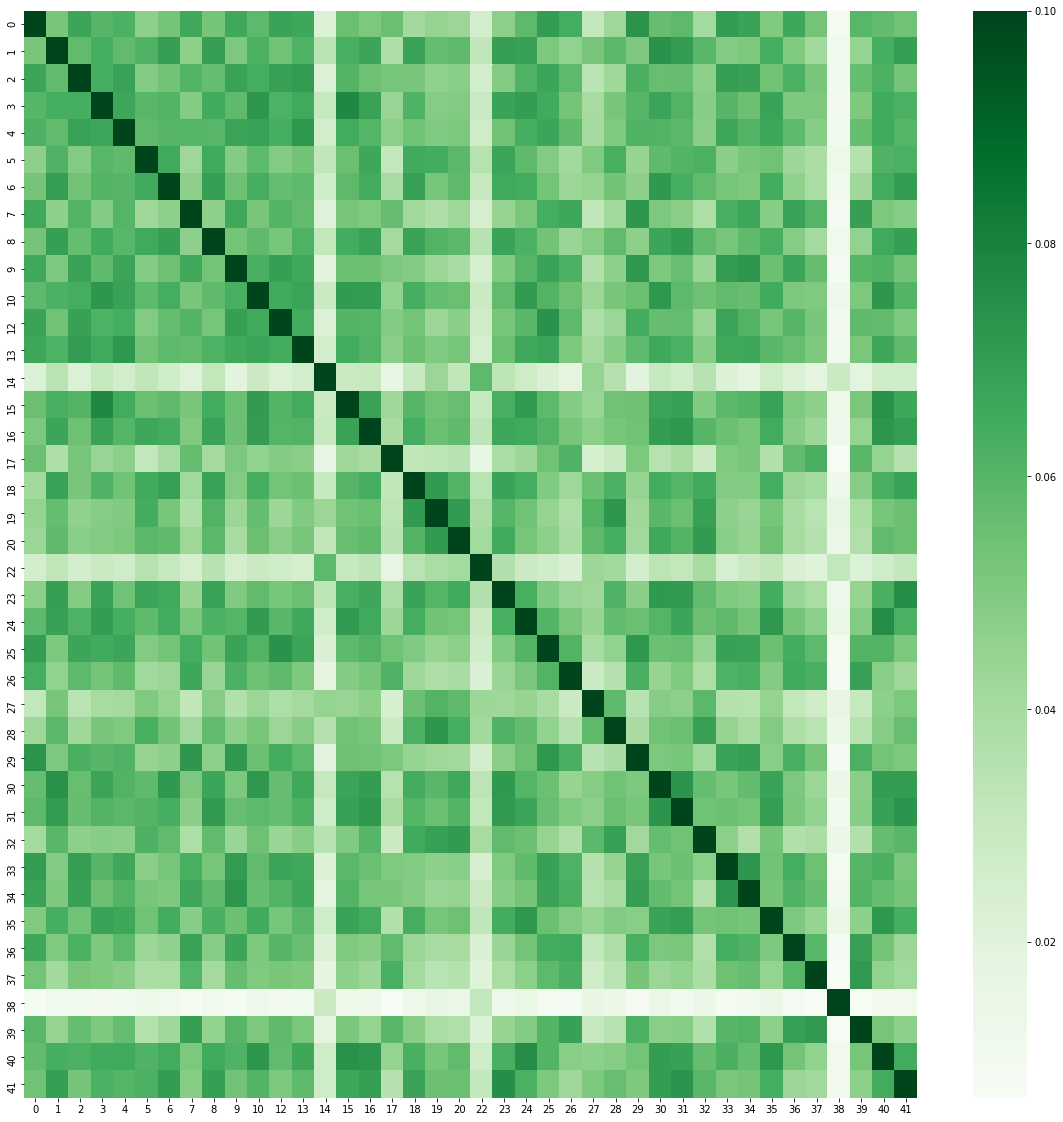

In [34]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches

sns.heatmap(results, cmap="Greens",vmax=0.1,ax=ax )
plt.show()

En general los texto tienen una similaridad entre un 2% a 8% aproximadamente, pero hay 3 textos que no muestran similaridad para nada, como son el texto 14, 22 y 38.

In [39]:
data.iloc[13]

Sexo                                                              H
T1                Los algoritmos de Machine Learning tienen como...
T2                                                             Null
T3                                                             Null
T4                Ensembling, es una estrategia exitosa en los c...
T5                                                             Null
T6                                                             Null
W1                Machine Learning algorithms have as main objec...
W2                                                             Null
W3                                                             Null
W4                Ensembling is a successful strategy in the con...
W5                                                             Null
W6                                                             Null
WorkText_Total    Machine Learning algorithms have as main objec...
Name: 14, dtype: object

Se concluye que son estudiantes que no hicieron las tareas :( 

# Exercise 18.3

Create a classifier to predict the sex of each student



Convertir en booleano el genero

In [41]:
data['Sex_Boolean']=data['Sexo']=='M'

In [43]:
data['Sex_Boolean'].head()

0    False
1    False
2    False
3     True
4    False
Name: Sex_Boolean, dtype: bool

Definir features

In [46]:
X=data['WorkText_Total']
y=data['Sex_Boolean']

Crear una funcion para entrenar con un regresión logistica

In [71]:
def training_token(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    lr = LogisticRegression()
    print(pd.Series(cross_val_score(lr, X_dtm, y, cv=10)).describe())

In [73]:
vect = CountVectorizer(max_features=1000,lowercase=True,ngram_range=(1, 3),stop_words='english')
training_token(vect)
##max_features=1000,lowercase=True,ngram_range=(1, 1),stop_words='english'

Features:  1000
count    10.000000
mean      0.776667
std       0.086496
min       0.666667
25%       0.750000
50%       0.750000
75%       0.787500
max       1.000000
dtype: float64


C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\rodri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


By: Ana Milena Rodríguez